In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv("Dataset/Placement_Data_Full_Class.csv")

In [3]:
#Top 5 records of dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#Shape of dataset
df.shape

(215, 15)

In [6]:
#Columns of dataset
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
#Statistical summary of dataset
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
#Check duplicated values in dataset
df.duplicated().sum()

0

In [10]:
#Check missing values in dataset
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- Here salary feature have missing values in dataset

### Feature Engineering

- Dropping Salary feature from dataset
- Filling zeros for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary

In [12]:
#Dropping Salary and sl_no features from dataset
df.drop(['sl_no', 'salary'], axis = 1, inplace= True)

In [13]:
df.shape

(215, 13)

In [14]:
df['status'].tolist()[:4]

['Placed', 'Placed', 'Placed', 'Not Placed']

In [15]:
#Encoding target variable 'status' 
df['status'] = df['status'].replace({'Placed':0, 'Not Placed':1})

### Creating Independent and dependent variable

In [16]:
X = df.drop('status', axis = 1)
y = df['status']

In [18]:
X.shape, y.shape

((215, 12), (215,))

In [19]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [21]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [22]:
type(y)

pandas.core.series.Series

In [23]:
#Splitting dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [24]:
x_train.shape, y_train.shape

((172, 12), (172,))

In [25]:
#Feature Encoding Method to convert categorical variable to numerical variable
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [26]:
cat_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation']

In [27]:
cat_columns

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [28]:
num_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
num_columns

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [29]:
num_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

cat_pipeline= Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder()),
        ('scaler', StandardScaler(with_mean= False))
    ]
)

preprocessor= ColumnTransformer(
    [
        ('num_pipeline',num_pipeline, num_columns),
        ('cat_pipeline', cat_pipeline, cat_columns)
    ]
)

In [30]:
x_train_trf = preprocessor.fit_transform(x_train)
x_test_trf = preprocessor.transform(x_test)

In [31]:
x_train_trf

array([[-0.41062939, -0.02969098, -0.08327934, ...,  2.10650852,
         2.01104265,  0.        ],
       [ 0.45569151, -0.94242717,  0.36837381, ...,  0.        ,
         0.        ,  2.01104265],
       [-0.07372682,  0.02399938,  0.40822555, ...,  2.10650852,
         2.01104265,  0.        ],
       ...,
       [ 0.93698089,  0.7577677 ,  0.89973045, ...,  0.        ,
         2.01104265,  0.        ],
       [-0.41062939, -0.58449141, -1.22569612, ...,  2.10650852,
         2.01104265,  0.        ],
       [ 0.55194938, -0.76345929, -1.35853529, ...,  0.        ,
         0.        ,  2.01104265]])

In [32]:
y_train

16     0
135    0
122    0
22     0
80     0
      ..
67     0
192    0
117    0
47     0
172    0
Name: status, Length: 172, dtype: int64

### Model Traning and Check the Performance of the Model

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train_trf, y_train)
reg_prediction = regressor.predict(x_test_trf)

In [35]:
#Performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
print("Logistic Regression : ")
print("Accuracy : ", accuracy_score(y_test, reg_prediction))
print("F1 score : ", f1_score(y_test, reg_prediction))
print("Confusion Matrix :\n", confusion_matrix(y_test, reg_prediction))
print("Classification Report :\n", classification_report(y_test, reg_prediction))

Logistic Regression : 
Accuracy :  0.813953488372093
F1 score :  0.7333333333333334
Confusion Matrix :
 [[24  3]
 [ 5 11]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.79      0.69      0.73        16

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



In [36]:
#Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train_trf, y_train)
dtree_prediction = dtree.predict(x_test_trf)

In [37]:
 #Random Forest Classifier
 forest = RandomForestClassifier(n_estimators= 100)
 forest.fit(x_train_trf, y_train)
 forest_prediction = forest.predict(x_test_trf)

In [38]:
#Let's check the performance of the models
print("Decision Tree Classification : ")
print("Accuracy : ", accuracy_score(y_test, dtree_prediction))
print("F1 score : ", f1_score(y_test, dtree_prediction))
print("Confusion Matrix :\n", confusion_matrix(y_test, dtree_prediction))
print("Classification Report :\n", classification_report(y_test, dtree_prediction))
print("###"* 20)


print("Random Forest Classification : ")
print("Accuracy : ", accuracy_score(y_test, forest_prediction))
print("F1 score : ", f1_score(y_test, forest_prediction))
print("Confusion Matrix :\n", confusion_matrix(y_test, forest_prediction))
print("Classification Report :\n", classification_report(y_test, forest_prediction))
print("###"* 20)

Decision Tree Classification : 
Accuracy :  0.6976744186046512
F1 score :  0.5806451612903225
Confusion Matrix :
 [[21  6]
 [ 7  9]]
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.60      0.56      0.58        16

    accuracy                           0.70        43
   macro avg       0.68      0.67      0.67        43
weighted avg       0.69      0.70      0.70        43

############################################################
Random Forest Classification : 
Accuracy :  0.7209302325581395
F1 score :  0.6000000000000001
Confusion Matrix :
 [[22  5]
 [ 7  9]]
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.64      0.56      0.60        16

    accuracy                           0.72        43
   macro avg       0.70      0.69      0.69        43
weighted avg       0.72 

In [39]:
#KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_trf, y_train)
knn_prediction = knn.predict(x_test_trf) 

#Support Vector Classifier
svc = SVC()
svc.fit(x_train_trf, y_train)
svc_prediction = svc.predict(x_test_trf)

In [40]:
#Let's check the performance of the models
print("KNeighbors Classification : ")
print("Accuracy : ", accuracy_score(y_test, knn_prediction))
print("F1 score : ", f1_score(y_test, knn_prediction))
print("Confusion Matrix :\n", confusion_matrix(y_test, knn_prediction))
print("Classification Report :\n", classification_report(y_test, knn_prediction))
print("###"* 20)


print("Support Vector Classification : ")
print("Accuracy : ", accuracy_score(y_test, svc_prediction))
print("F1 score : ", f1_score(y_test, svc_prediction))
print("Confusion Matrix :\n", confusion_matrix(y_test, svc_prediction))
print("Classification Report :\n", classification_report(y_test, svc_prediction))
print("###"* 20)

KNeighbors Classification : 
Accuracy :  0.627906976744186
F1 score :  0.2
Confusion Matrix :
 [[25  2]
 [14  2]]
Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.93      0.76        27
           1       0.50      0.12      0.20        16

    accuracy                           0.63        43
   macro avg       0.57      0.53      0.48        43
weighted avg       0.59      0.63      0.55        43

############################################################
Support Vector Classification : 
Accuracy :  0.7674418604651163
F1 score :  0.5833333333333334
Confusion Matrix :
 [[26  1]
 [ 9  7]]
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.96      0.84        27
           1       0.88      0.44      0.58        16

    accuracy                           0.77        43
   macro avg       0.81      0.70      0.71        43
weighted avg       0.79      0.77      0.7

In [41]:
X_trf = preprocessor.fit_transform(X)

- Here we can see that out of all above classification models, logistic regresssion give good accuracy. 

### Hyperparameter Tunning

In [52]:
#Hyperparameter Tunning Using GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,20,30,40],
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30],
            'min_samples_split':[2,4,6]
        }
    },
    'dt':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[1,2,3,5],
            'splitter':['best','random'],
        }
    },
    
    'lr':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1','l2'],
            'C':[0.1,0.01,1,0.5],
            'solver':['liblinear','lbfgs']
        }
    
    },
    
    'svm':{
        'model':SVC(),
        'params':{
            'C':[0.1,0.01,1,0.5],
            'kernel':['linear','poly','rbf']
            
        }
    },
    
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15,20,30]
        }
    }
    
}

scores = []

for model_name,config in params.items():
   gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=5,return_train_score=False)
   gd.fit(x_train_trf,y_train)
   scores.append({'model_name':model_name,'best_score':np.round(gd.best_score_,2)*100,'best_params':gd.best_params_})

scores = pd.DataFrame(scores).sort_values(by='best_score', ascending = False)
scores.head()

,model_name,best_score,best_params
0,rf,90.0,"{'criterion': 'entropy', 'max_depth': 30, 'min..."
2,lr,90.0,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
3,svm,89.0,"{'C': 0.1, 'kernel': 'linear'}"
1,dt,85.0,"{'criterion': 'entropy', 'max_depth': 3, 'spli..."
4,knn,80.0,{'n_neighbors': 5}


In [47]:
#best parameter of the model
scores.iloc[0]

model_name                                svm
best_score                               88.0
best_params    {'C': 0.1, 'kernel': 'linear'}
Name: 3, dtype: object

- After hyperparameter Tunning, SVC model gives best accuracy score than all other models.
- So here we are goona use SVC model for training dataset

In [72]:
#LogisticRegression 
log_reg = LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear')

In [58]:
#Train the model
log_reg.fit(x_train_trf, y_train)

LogisticRegression(C=1, solver='liblinear')

In [59]:
#Predict the model 
y_pred = log_reg.predict(x_test_trf)

In [62]:
#Accuracy of the model
print(accuracy_score(y_test, y_pred))

0.813953488372093


In [69]:
#AUC - ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve,auc

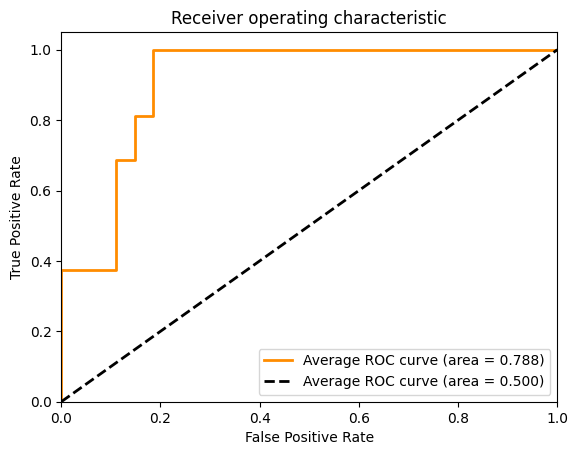

In [70]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, log_reg.predict(x_test_trf))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(x_test_trf)[:,1])

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
# calculate auc 
auc_score = auc(fpr, tpr)
print(f"Our auc_score came out to be {round(auc_score, 3)}.")

Our auc_score came out to be 0.912.
